# Analysing Election Data: Trump vs Clinton

### Import Libraries 

In [11]:
# Importing numpy, pandas and Series + DataFrame:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Imports for plotting:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [12]:
# Importing requests to grab data from the web(HTTP capabilities)
import requests

# For working with csv file, we import StringIO
from io import StringIO

### Setting the Data up 

In [23]:
# URL link for the poll data in csv form:
url = 'https://elections.huffingtonpost.com/pollster/2016-general-election-trump-vs-clinton.csv'

In [24]:
# Using requests to get data:
source = requests.get(url).text

poll_data = StringIO(source)

In [25]:
# Dataframe for poll_data:

poll_df = pd.read_csv(poll_data)

### Analysing Data 

In [26]:
# Preview DataFrame:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1


In [28]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 17 columns):
Pollster                  1522 non-null object
Start Date                1522 non-null object
End Date                  1522 non-null object
Entry Date/Time (ET)      1522 non-null object
Number of Observations    1013 non-null float64
Population                1522 non-null object
Mode                      1522 non-null object
Trump                     1522 non-null float64
Clinton                   1522 non-null float64
Other                     1098 non-null float64
Undecided                 1460 non-null float64
Pollster URL              1522 non-null object
Source URL                1522 non-null object
Partisan                  1522 non-null object
Affiliation               1522 non-null object
Question Text             661 non-null object
Question Iteration        1522 non-null int64
dtypes: float64(5), int64(1), object(11)
memory usage: 202.2+ KB


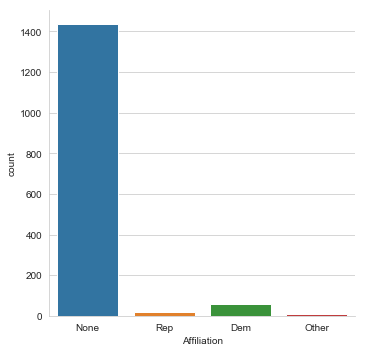

In [32]:
# Factorpolot for the affiliation:
sns.factorplot('Affiliation', data = poll_df, kind = 'count')

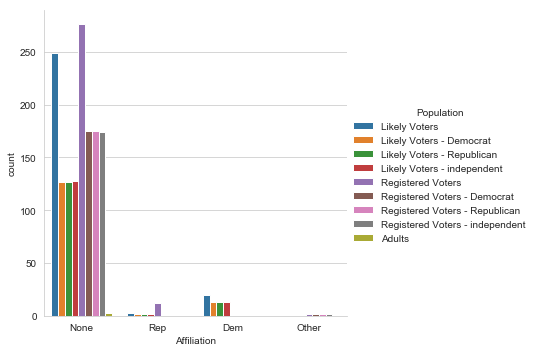

In [33]:
# Factorplot for the affiliation by population:
sns.factorplot('Affiliation',data=poll_df, hue='Population', kind = 'count')

In [39]:
# To get the average:
avg = pd.DataFrame(poll_df.mean())

avg.drop(['Number of Observations', 'Other', 'Question Iteration'], axis=0, inplace=True)

In [40]:
avg.head()

,0
Trump,40.643890
Clinton,42.733903
Undecided,9.315068


In [41]:
# To get the error:
std = pd.DataFrame(poll_df.std())

std.drop(['Number of Observations', 'Other', 'Question Iteration'], axis=0, inplace=True)

In [42]:
std.head()

,0
Trump,23.566390
Clinton,25.298731
Undecided,6.253118


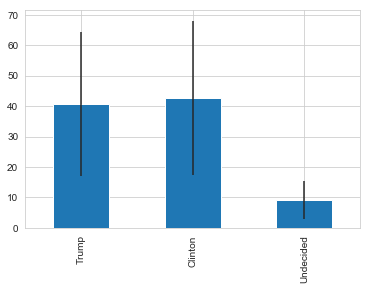

In [43]:
avg.plot(yerr = std, kind = 'bar',legend = False)

In [44]:
# Concatenating our average and standard deviation DataFrames:
poll_avg = pd.concat([avg,std], axis = 1)

In [46]:
poll_avg

,0,0
Trump,40.643890,23.566390
Clinton,42.733903,25.298731
Undecided,9.315068,6.253118


In [48]:
# Renameing the columns:
poll_avg.columns = ['Average', 'STD']

In [49]:
poll_avg

,Average,STD
Trump,40.643890,23.566390
Clinton,42.733903,25.298731
Undecided,9.315068,6.253118


### Analysing Polls

In [50]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1


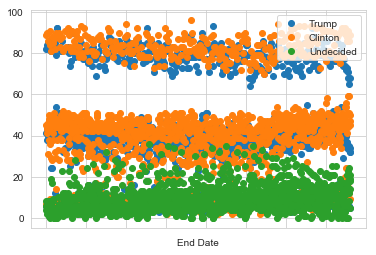

In [51]:
poll_df.plot(x='End Date', y=['Trump','Clinton','Undecided'], linestyle = '', marker = 'o')

In [52]:
from datetime import datetime

In [53]:
poll_df['Difference'] = (poll_df.Trump - poll_df.Clinton)/100

In [54]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Trump,Clinton,Other,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,940.0,Likely Voters,Internet,41.0,45.0,2.0,8.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,-0.04
1,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Democrat,Internet,6.0,89.0,0.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,-0.83
2,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - Republican,Internet,82.0,7.0,2.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,0.75
3,Insights West,2016-11-04,2016-11-07,2016-11-08T12:16:30Z,NaN,Likely Voters - independent,Internet,38.0,43.0,4.0,7.0,http://elections.huffingtonpost.com/pollster/p...,http://www.insightswest.com/news/clinton-is-ah...,Nonpartisan,None,"As you may know, there will be a presidential ...",1,-0.05
4,IBD/TIPP,2016-11-04,2016-11-07,2016-11-08T12:10:06Z,1107.0,Likely Voters,Live Phone,43.0,41.0,4.0,5.0,http://elections.huffingtonpost.com/pollster/p...,http://www.investors.com/politics/ibd-tipp-pre...,Nonpartisan,None,NaN,1,0.02


In [57]:
poll_df = poll_df.groupby(['Start Date'], as_index = False).mean()

In [58]:
poll_df.head()

,Start Date,Number of Observations,Trump,Clinton,Other,Undecided,Question Iteration,Difference
0,2015-05-19,1046.00,34.25,48.75,2.5,14.00,1.0,-0.1450
1,2015-06-20,420.75,35.00,47.25,NaN,17.75,1.0,-0.1225
2,2015-06-21,1005.00,34.00,51.00,3.0,12.00,1.0,-0.1700
3,2015-06-26,890.00,36.75,57.00,6.0,0.00,1.0,-0.2025
4,2015-07-09,499.25,35.25,49.50,NaN,16.00,1.0,-0.1425


##### The Difference column is Trump minus Clinton thus a negative difference indicates a leaning towards Clinton in the polls. 

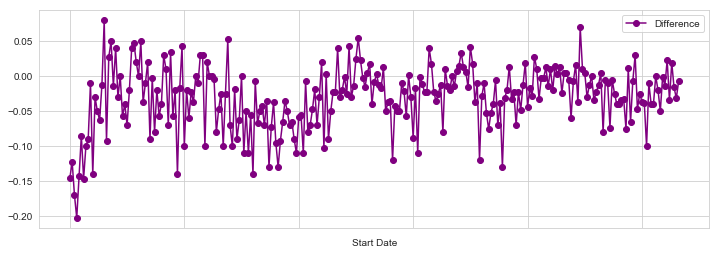

In [59]:
poll_df.plot('Start Date', 'Difference', figsize = (12,4), marker = 'o', linestyle = '-', color = 'purple')

###### We want to plot marker lines on the dates of the debates and see if there is any general insight to the poll results.
###### The debate dates were Oct 4rd, Oct 9, and Oct 19nd. Let's plot some lines as markers and then zoom in on the month of October.
###### In order to find where to set the x limits for the figure we need to find out where the index for the month of October in 2016 is. Here's a simple for loop to find that row. 

In [68]:
row_in = 0
xlimit = []

for date in poll_df['Start Date']:
    if date[0:7] == '2016-10':
        xlimit.append(row_in)
        row_in += 1
    else: 
        row_in += 1
        
print (min(xlimit))
print (max(xlimit))


232
262


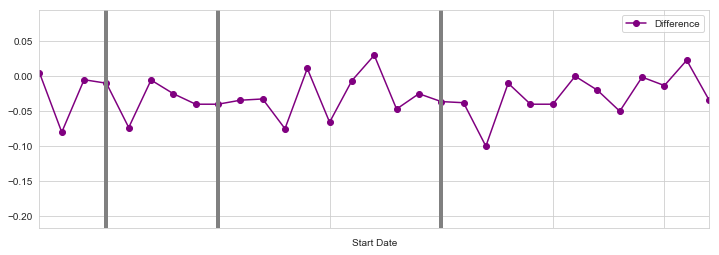

In [71]:
poll_df.plot('Start Date', 'Difference', figsize = (12,4), marker = 'o', linestyle = '-', color = 'purple', xlim=(232,262))

# October 4th
plt.axvline(x = 232 + 3, linewidth = 4, color = 'grey')

# October 9th
plt.axvline(x = 232 + 8, linewidth = 4, color = 'grey')

# October 19th
plt.axvline(x = 232 + 18, linewidth = 4, color = 'grey')

###### After first debate Clinton dominates polls, Trump takes lead only on some occations after second and third debate. 
###### For all these polls it is important to remeber that geographical location can effect the value of a poll in predicting the outcomes of a national election. It is not number of votes that decided in this case but the voting selection process.